In [8]:
!pip install xgboost

ERROR: Could not install packages due to an EnvironmentError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/b8/1c/8384c92f40e9a4739d0b474573d9bfd19b7846b5d28f6c53294e2c5c5af4/xgboost-1.2.0-py3-none-win_amd64.whl (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1108)')))



In [62]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,MissingIndicator
from sklearn.decomposition import TruncatedSVD
#from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,f1_score,log_loss,precision_recall_curve
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#import missingno as msno
from sklearn.decomposition import PCA
from datetime import datetime
#from pyod.models.auto_encoder import AutoEncoder
#from pyod.models.feature_bagging import FeatureBagging
#from fancyimpute import SoftImpute
#from impyute.imputation.cs import mice

In [11]:
train = pd.read_csv('final/aps_failure_training_set.csv')

In [12]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [14]:
train.shape

(60000, 171)

In [16]:
test = pd.read_csv('final/aps_failure_test_set.csv')

In [17]:
test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [18]:
test.shape

(16000, 171)

In [19]:
# Replacing all the class labels as follows:

# neg = 0
# pos = 1
class_labels_train = []
for x in tqdm(train.index):
    if train['class'].loc[x] == 'neg':
        class_labels_train.append(0)
        
    else:
        class_labels_train.append(1)

100%|█████████████████████████████████████████████████████████████████████████| 60000/60000 [00:00<00:00, 60060.10it/s]


In [20]:
train['class'] = class_labels_train

In [21]:
train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [22]:

# Distrubution of class labels in train dataset
train['class'].value_counts()

0    59000
1     1000
Name: class, dtype: int64

Text(0.5, 1.0, 'Histogram plot of class labels')

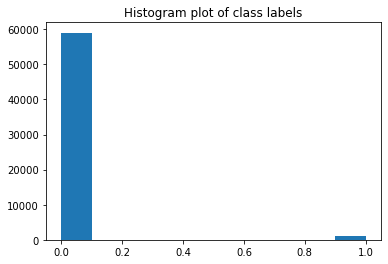

In [23]:

# Histogram plot of class labels of train dataset
plt.hist(train['class'])
plt.title("Histogram plot of class labels")

In [24]:
print("Percentage of negative class in the given dataset :", (train[train['class']== 0].shape[0] / train.shape[0]) * 100)
print("Percentage of positive class in the given dataset :", (train[train['class']== 1].shape[0] / train.shape[0]) * 100)

Percentage of negative class in the given dataset : 98.33333333333333
Percentage of positive class in the given dataset : 1.6666666666666667


In [25]:

y_train = train['class']
train.drop(['class'],axis = 1,inplace = True)

In [26]:
train.describe(include='all')

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,NaN,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,NaN,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Replacing the na and nan values with np.NaN
train.replace(to_replace='nan', value = np.NaN,inplace = True)

train.replace(to_replace = 'na', value = np.NaN, inplace = True)

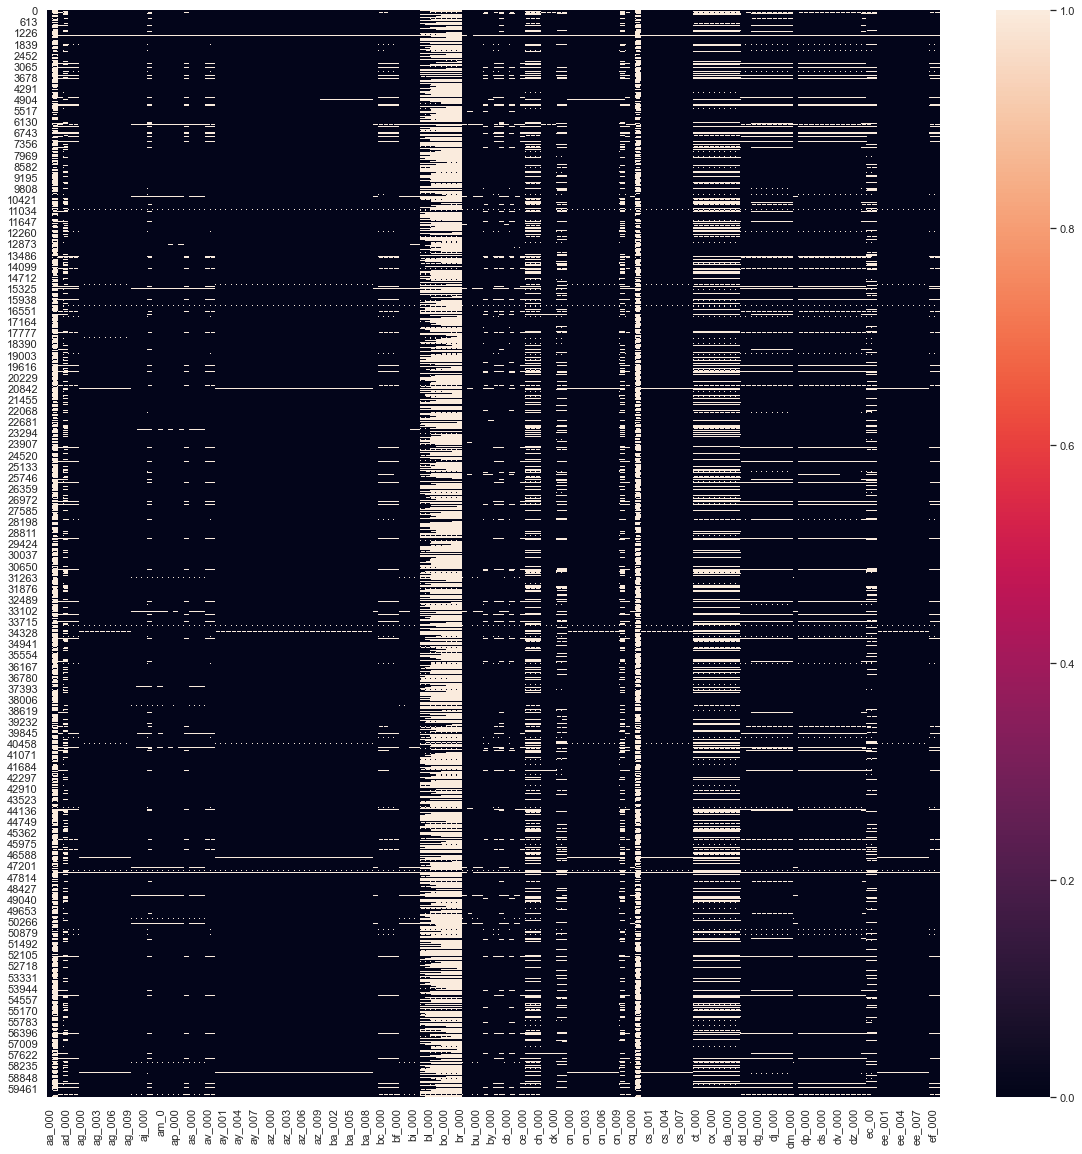

In [28]:
# plotting the heatmap of train dataset to visualize the null values.
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(train.isnull())
plt.show(plot)

In [ ]:

columns_names = train.columns

In [1]:

# Plot to indicate the number of missing values in each column of the dataset.
msno.bar(train[columns_names[0:50]])
msno.bar(train[columns_names[50:100]])
msno.bar(train[columns_names[100:150]])
msno.bar(train[columns_names[150:171]])

NameError: name 'msno' is not defined

In [29]:
# Dropping all the columns where the number of missing values are more than 42K
train.dropna(axis = 1, thresh=42000,inplace= True)

In [30]:
train.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,2130706438,280,0,0,0,0,0,0,37250,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,NaN,0,0,0,0,0,0,18254,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,228,100,0,0,0,0,0,0,1648,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,70,66,0,10,0,0,0,318,2212,...,240,46,58,44,10,0,0,0,4,32
4,60874,1368,458,0,0,0,0,0,0,43752,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [49]:
# Imputation using median
impute_median = SimpleImputer(missing_values= np.nan, strategy='median',copy = True, verbose= 2)
train_imputed_median = pd.DataFrame(impute_median.fit_transform(train),columns=train.columns)
train_imputed_median.to_csv("Train_imputed_median")

In [50]:

# Imputation using mean
impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
train_imputed_mean = pd.DataFrame(impute_mean.fit_transform(train),columns=train.columns)
train_imputed_mean.to_csv("Train_imputed_mean")

In [51]:

# Imputation using most frequent
impute_most_frequent = SimpleImputer(missing_values= np.nan, strategy='most_frequent',copy = True, verbose= 2)
train_imputed_most_frequent = pd.DataFrame(impute_most_frequent.fit_transform(train),columns=train.columns)
train_imputed_most_frequent.to_csv("Train_imputed_most_frequent")

In [52]:

# Feature engineering, creating a new feature set which indicates the missing value in a given row and column as True else False
missing_impute = MissingIndicator()
miss = missing_impute.fit_transform(train)
train_miss_indi = pd.DataFrame(miss)
train_miss_indi.to_csv('train_miss_indi.csv')

In [35]:
y_test = test['class']
test.drop(['class'],axis =1, inplace= True)

In [36]:
y_test.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [37]:

# Replacing all the class labels as follows:

# neg = 0
# pos = 1
class_labels_test = []
for x in tqdm(y_test.index):
    if y_test.loc[x] == 'neg':
        class_labels_test.append(0)
        
    else:
        class_labels_test.append(1)

y_test = class_labels_test

100%|█████████████████████████████████████████████████████████████████████████| 16000/16000 [00:00<00:00, 66942.24it/s]


In [38]:
test = test[train.columns]
test.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,20,12,0,0,0,0,0,2682,4736,...,1098,138,412,654,78,88,0,0,0,0
1,82,68,40,0,0,0,0,0,0,748,...,1068,276,1620,116,86,462,0,0,0,0
2,66002,212,112,0,0,0,0,0,199486,1358536,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,59816,1010,936,0,0,0,0,0,0,123922,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,1814,156,140,0,0,0,0,0,0,72,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [39]:
test.describe(include='all')

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,16000,16000,16000,16000,16000,16000,16000,16000,16000,...,16000,16000,16000,16000,16000,16000,16000,16000,16000,16000
unique,NaN,1312,1203,171,202,60,222,801,2836,8648,...,11938,11039,11818,11916,10832,10272,8315,4043,13,25
top,NaN,0,na,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,2289,3981,14764,14741,15749,15575,14954,12442,340,...,356,406,469,735,1151,2061,4500,8432,15167,15107
mean,6.799698e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.035350e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.280000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.098200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.947900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
test.replace(to_replace=['na','nan'],value = np.NaN,inplace=True)

In [41]:
test.describe(include='all')

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,15074,12019,15310,15310,15811,15811,15811,15811,15811,...,15808,15808,15808,15808,15808,15808,15808,15808,15238,15238
unique,NaN,1311,1202,170,201,59,221,800,2835,8647,...,11937,11038,11817,11915,10831,10271,8314,4042,12,24
top,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,NaN,2289,519,14764,14741,15749,15575,14954,12442,340,...,356,406,469,735,1151,2061,4500,8432,15167,15107
mean,6.799698e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.035350e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.280000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.098200e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.947900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:

# Median Imputation
test_imputed_median = pd.DataFrame(impute_median.transform(test),columns=train.columns)
test_imputed_median.to_csv("test_imputed_median")

In [43]:

# Mean Imputation
test_imputed_mean = pd.DataFrame(impute_mean.transform(test),columns=train.columns)
test_imputed_mean.to_csv("test_imputed_mean")

In [44]:
# Most Frequent Imputation
test_imputed_most_frequent = pd.DataFrame(impute_most_frequent.transform(test),columns=train.columns)
test_imputed_most_frequent.to_csv("test_imputed_most_frequent")


In [45]:

# missing value indicator feature set.
miss = missing_impute.transform(test)
test_miss_indi = pd.DataFrame(miss)
test_miss_indi.to_csv('test_miss_indi.csv')

In [46]:
y_test = pd.DataFrame(y_test)
y_test.to_csv('y_test.csv')

In [55]:
# Defining the LR model and performing the hyper parameter tuning using gridsearch
#weights = np.linspace(0.05, 0.95, 20)
params = {'C' : [10**-4,10**-3,10**-2,10**-1,1,10**1,10**2,10**3],
          'penalty': ['l1', 'l2']#,'class_weight': [{0: x, 1: 1.0-x} for x in weights]
         }
clf = LogisticRegression(n_jobs= -1,random_state=42)
clf.fit(train_imputed_median,y_train)
model = GridSearchCV(estimator=clf,cv = 2,n_jobs= -1,param_grid=params,scoring='f1',verbose= 2,)
model.fit(train_imputed_median,y_train)
print("Best estimator is", model.best_params_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    6.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    7.6s finished


Best estimator is {'C': 10, 'penalty': 'l2'}


In [57]:
y_pred = clf.predict(test_imputed_median)
con_mat =confusion_matrix (y_test, y_pred)
print("-"*117)
print('Confusion Matrix: ', '\n',con_mat)
print("-"*117)
print("Type 1 error (False Positive) = ", con_mat[0][1])
print("Type 2 error (False Negative) = ", con_mat[1][0])
print("-"*117)
print("Total cost = ", con_mat[0][1] * 10 + con_mat[1][0] * 500)
print("-"*117)

---------------------------------------------------------------------------------------------------------------------
Confusion Matrix:  
 [[15563    62]
 [  151   224]]
---------------------------------------------------------------------------------------------------------------------
Type 1 error (False Positive) =  62
Type 2 error (False Negative) =  151
---------------------------------------------------------------------------------------------------------------------
Total cost =  76120
---------------------------------------------------------------------------------------------------------------------


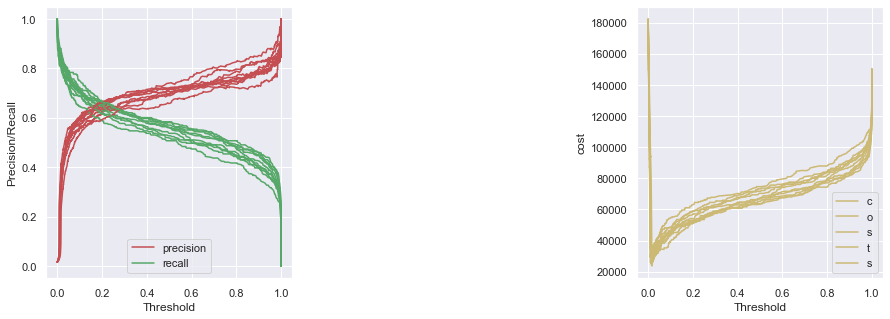

In [63]:
# Cross Validation to find the best threshold.
trail = 10
plot = []
for x in range(0,trail):
    train, test, y_tr, y_ts = train_test_split(train_imputed_median, y_train, stratify = y_train, train_size = 0.7)
    clf.fit(train,y_tr)
    pred = clf.predict_proba(test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_ts, pred)
    thresholds = np.append(thresholds,1)
      
    costs = []
    for threshold in thresholds:
        y_pred_thres = pred > threshold
        c = confusion_matrix(y_ts,y_pred_thres)
        cost = c[0,1] * 10 + c[1,0] * 500
        costs.append(cost)
        
    plot.append({'threshold': thresholds, 'precision':precision,'recall': recall, 'costs':costs})
    
# Plot of recall, precision v/s threshold and cost v/s threshold
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for x in plot:
    plt.plot(x['threshold'],x['precision'],'r')
    plt.plot(x['threshold'],x['recall'],'g')
    
plt.legend(('precision','recall'))
plt.xlabel('Threshold')
plt.ylabel("Precision/Recall")
plt.subplot(1,3,3)
for x in plot:
    plt.plot(x['threshold'],x['costs'],'y')
plt.legend(('costs'))
plt.xlabel('Threshold')
plt.ylabel("cost")
plt.show()